# Finance Data Project

- Focus on exploratory data analysis of stock prices.
- Practice Visiualization, not intended to be a robust financial analysis.

## Get the Data

In [1]:
from pandas_datareader import data as web, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

## Data

Get the data via a pickle file with Pandas. The stock information will be for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
df = pd.read_pickle('all_banks')

In [5]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA
Max "Close" price for each bank's stock throughout the time period.

In [6]:
df.xs(key='Close', axis=1, level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.

In [7]:
returns = pd.DataFrame()

Use pandas .pct_change method to represent 'returns' value and create a column for each bank by looping through each ticker.

In [8]:
for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()

In [9]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


Create a pairplot using seaborn of the returns dataframe.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 1440x1440 with 0 Axes>

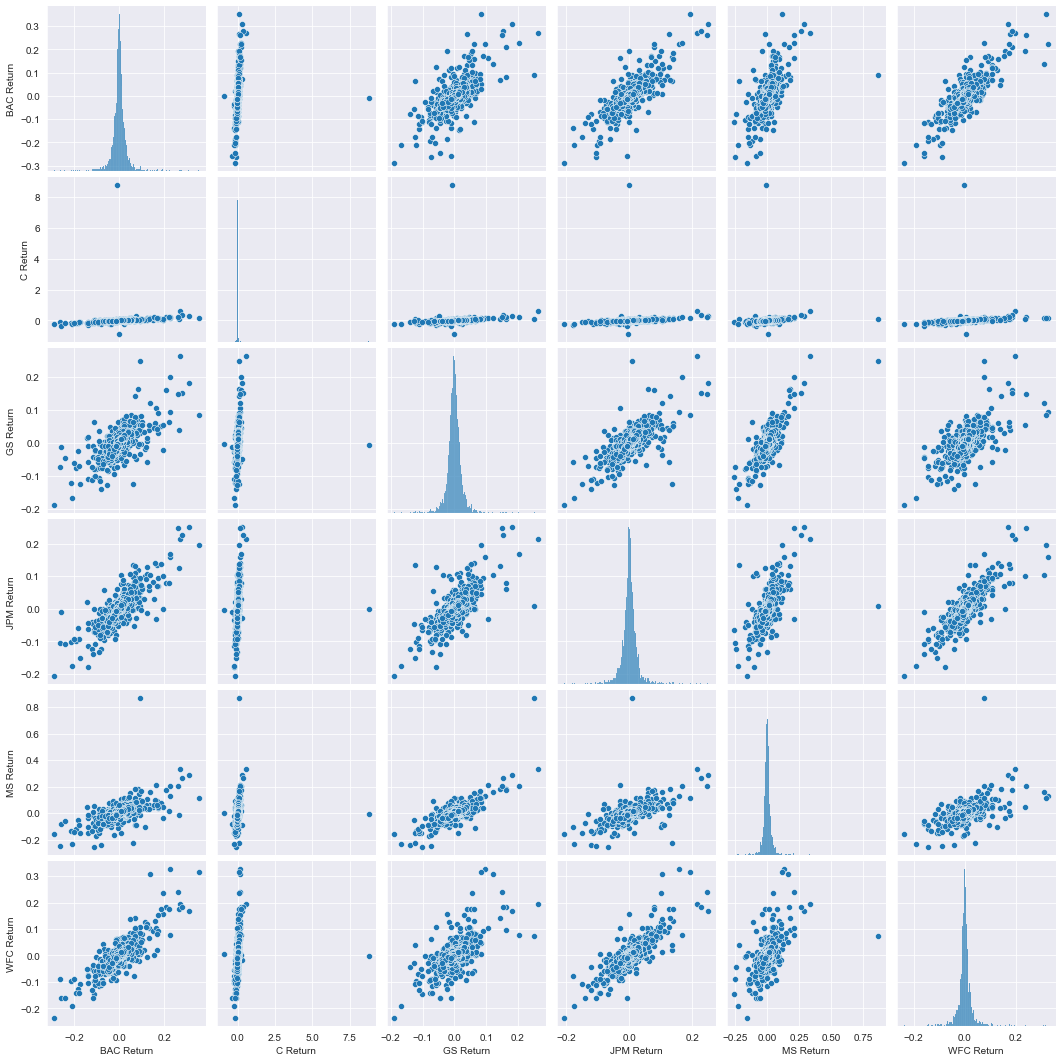

In [10]:
plt.figure(figsize=(20,20))
sns.pairplot(returns[1:])
plt.tight_layout

Figure out on which days each bank had a best and worst return in a single day.

Here we notice that 4 of the banks share the same day for each minimum return value. Furthermore, Citigroup's maximum single day return and minimum single day return were roughly three days apart. 

In [11]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [12]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [13]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Check out the standard deviation to find out which stock would be classified as the riskiest over the entire time period...

In [14]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Same thing, but for the 2015 time period. In this case, the profiles are very similar but likely Morgan Stanley or Bank of America.

In [15]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Let's create a distpot of 2015 returns for Morgan Stanley. 

In [16]:
ms_return = returns.loc['2015-01-01':'2015-12-31']['MS Return']

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

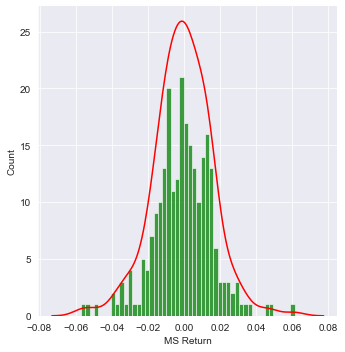

In [17]:
sns.displot(data=ms_return, color='green', bins=50)
sns.kdeplot(x=ms_return, color='r')

And 2008 returns for Citigroup:

<AxesSubplot:xlabel='C Return', ylabel='Count'>

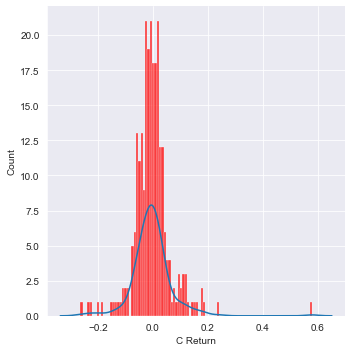

In [18]:
sns.displot(data=returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=100)
sns.kdeplot(x=returns.loc['2008-01-01':'2008-12-31']['C Return'], gridsize = 500)

____

# More Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

### Line plot showing close prices for the entire index of time from the original DataFrame:

In [20]:
df

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

It would be useful to grab a cross section of data for to incorporate all closing prices into one dataframe...

In [21]:
closePrices = df.xs('Close', axis = 1, level='Stock Info')

In [22]:
closePrices.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


<AxesSubplot:xlabel='Date'>

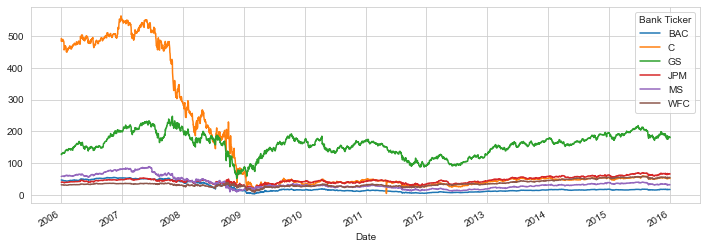

In [23]:
closePrices.plot(figsize=(12,4))


Interactive visulization of the same thing, for fun!

In [24]:
closePrices.iplot()

## Moving Averages

Analyze moving averages for the stocks in 2008 by plotting the 30 day rolling average against the BAC Closing Prices.

In [25]:
closePrices.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


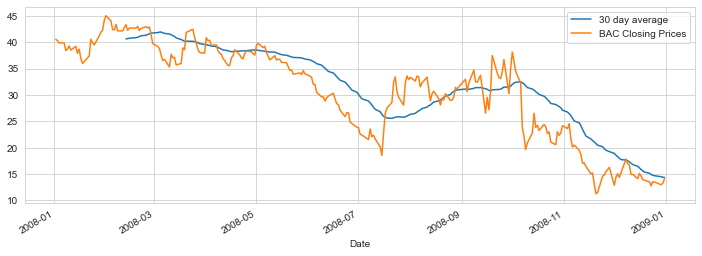

In [26]:
closePrices['BAC'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label= '30 day average', figsize=(12,4))
closePrices['BAC'].loc['2008-01-01':'2008-12-31'].plot(label = 'BAC Closing Prices')
plt.legend()

Find a correlation between the stock's closing price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

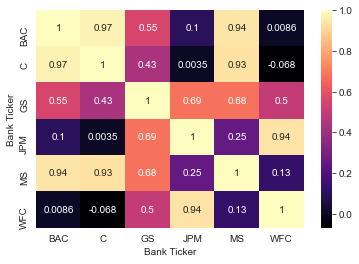

In [27]:
sns.heatmap(df.xs('Close', axis=1, level='Stock Info').corr(), annot=True, cmap='magma')

Here I will use a cluster map to hierarchically structure the correlations with the .corr() method from Pandas

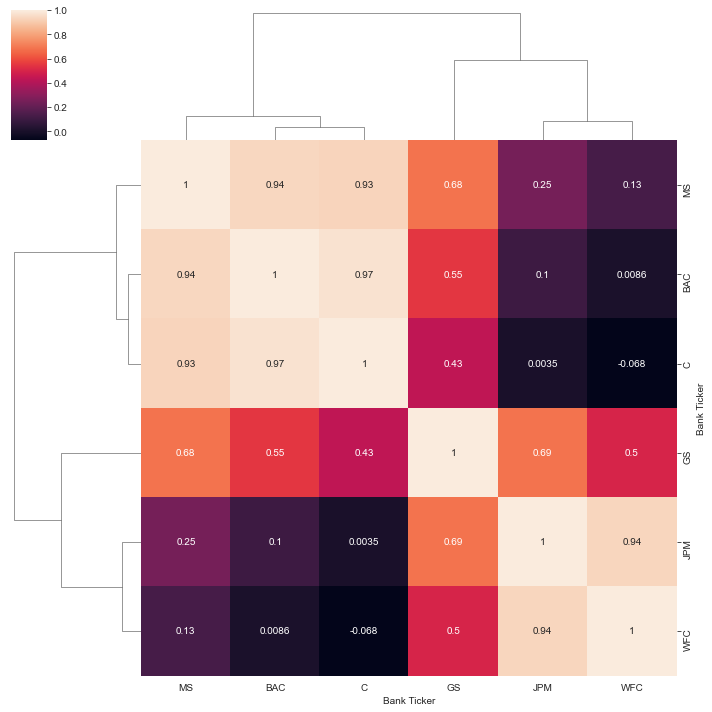

In [28]:
sns.clustermap(df.xs('Close', axis=1, level='Stock Info').corr(), annot=True)

Here, I will create a candle plot of BAC's stock price from January 1, 2015 through January 1, 2016.

In [29]:
BAC = df['BAC']

In [30]:
BAC2015 = BAC.loc['2015-01-01':'2016-01-01']

In [31]:
BAC2015

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,17.99,18.03,17.68,17.90,48951133
2015-01-05,17.78,17.81,17.29,17.38,105605485
2015-01-06,17.42,17.44,16.78,16.86,144912399
2015-01-07,17.14,17.18,16.87,16.94,104603795
2015-01-08,17.16,17.34,17.10,17.29,73388499
...,...,...,...,...,...
2015-12-24,17.32,17.38,17.22,17.27,29373415
2015-12-28,17.22,17.23,16.98,17.13,41777497
2015-12-29,17.25,17.35,17.16,17.28,45670376


In [32]:
BAC2015.iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [33]:
MS = df.loc['2015-01-01':'2015-12-31', 'MS']

In [34]:
MS.drop(labels='Volume', axis=1, inplace=True)

In [35]:
MS['Close'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

This creates a plot of the simple moving average and a standard deviation above AND below said simple moving average.

In [36]:
BAC2015.drop(labels='Volume', axis=1)['Close'].ta_plot(study='boll')